## Import packages

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

In [ ]:
from sklearn import svm

In [ ]:
import warnings
warnings.filterwarnings("ignore")

## Data loading

In [ ]:
data = pd.read_csv("Cardiotocography.csv")

In [ ]:
data.head()

,id,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,outlier
0,1881.0,0.592593,0.000000,0.000000,0.294118,0.633803,0.338235,0.000000,0.013807,0.500000,...,0.045872,0.336207,0.333333,0.1,0.485149,0.247423,0.284091,0.638418,1.0,b'yes'
1,421.0,0.574074,0.038462,0.000000,0.000000,0.816901,0.029412,0.527473,0.092702,0.000000,...,0.770642,0.672414,0.166667,0.0,0.534653,0.587629,0.511364,0.016949,0.0,b'yes'
2,92.0,0.777778,0.000000,0.000000,0.000000,0.774648,0.029412,0.736264,0.096647,0.000000,...,0.816514,0.275862,0.222222,0.0,0.633663,0.659794,0.602273,0.000000,1.0,b'yes'
3,1767.0,0.259259,0.000000,0.000000,0.294118,0.704225,0.191176,0.000000,0.183432,0.428571,...,0.174312,0.275862,0.222222,0.1,0.000000,0.164948,0.000000,0.361582,0.0,b'yes'
4,1880.0,0.592593,0.000000,0.001773,0.294118,0.633803,0.352941,0.000000,0.013807,0.428571,...,0.045872,0.336207,0.333333,0.1,0.485149,0.226804,0.272727,0.683616,1.0,b'yes'


In [ ]:
data['DS']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
16875    0.0
16876    0.0
16877    0.0
16878    0.0
16879    0.0
Name: DS, Length: 16880, dtype: float64

## EDA

In [ ]:
len(data.columns)

23

- LB:	Fetal Heart Rate baseline (beats per minute)
- AC:	# of accelerations per second
- FM:	# of fetal movements per second
- UC:	# of uterine contractions per second
- DL:	# of light decelerations per second
- DS:	# of severe decelerations per second
- DP:	# of prolongued decelerations per second
- ASTV:	percentage of time with abnormal short term variability
- MSTV:	mean value of short term variability
- ALTV:	percentage of time with abnormal long term variability
- MLTV:	mean value of long term variability
- Width:	width of FHR histogram
- Min:	minimum of FHR histogram
- Max:	maximum of FHR histogram
- Nmax:	# of histogram peaks
- Nzeros:	# of histogram zeros
- Mode:	histogram mode
- Mean:	histogram mean
- Median:	histogram median
- Variance:	histogram variance
- Tendency:	histogram tendency

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16880 entries, 0 to 16879
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        16880 non-null  float64
 1   LB        16880 non-null  float64
 2   AC        16880 non-null  float64
 3   FM        16880 non-null  float64
 4   UC        16880 non-null  float64
 5   ASTV      16880 non-null  float64
 6   MSTV      16880 non-null  float64
 7   ALTV      16880 non-null  float64
 8   MLTV      16880 non-null  float64
 9   DL        16880 non-null  float64
 10  DS        16880 non-null  float64
 11  DP        16880 non-null  float64
 12  Width     16880 non-null  float64
 13  Min       16880 non-null  float64
 14  Max       16880 non-null  float64
 15  Nmax      16880 non-null  float64
 16  Nzeros    16880 non-null  float64
 17  Mode      16880 non-null  float64
 18  Mean      16880 non-null  float64
 19  Median    16880 non-null  float64
 20  Variance  16880 non-null  fl

In [ ]:
data.isna().sum()

id          0
LB          0
AC          0
FM          0
UC          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
DL          0
DS          0
DP          0
Width       0
Min         0
Max         0
Nmax        0
Nzeros      0
Mode        0
Mean        0
Median      0
Variance    0
Tendency    0
outlier     0
dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,16880.0,1123.872156,593.610901,1.0,641.000000,1150.500000,1619.000000,2126.0
LB,16880.0,0.483186,0.175738,0.0,0.351852,0.481481,0.592593,1.0
AC,16880.0,0.129270,0.143077,0.0,0.000000,0.076923,0.192308,1.0
FM,16880.0,0.011411,0.060514,0.0,0.000000,0.000000,0.003546,1.0
UC,16880.0,0.226668,0.156665,0.0,0.117647,0.235294,0.304348,1.0
ASTV,16880.0,0.425672,0.216970,0.0,0.236111,0.408451,0.608108,1.0
MSTV,16880.0,0.179521,0.121198,0.0,0.088235,0.161765,0.220588,1.0
ALTV,16880.0,0.064739,0.146732,0.0,0.000000,0.000000,0.050633,1.0
MLTV,16880.0,0.170819,0.114551,0.0,0.094675,0.155819,0.226824,1.0
DL,16880.0,0.113227,0.171935,0.0,0.000000,0.000000,0.214286,1.0


Some columns that are numeric seem to have categorical behavior.

In [ ]:
data['id'].nunique()

1902

In [ ]:
del data["id"]

In [ ]:
data["outlier"].value_counts()

b'no'     16550
b'yes'      330
Name: outlier, dtype: int64

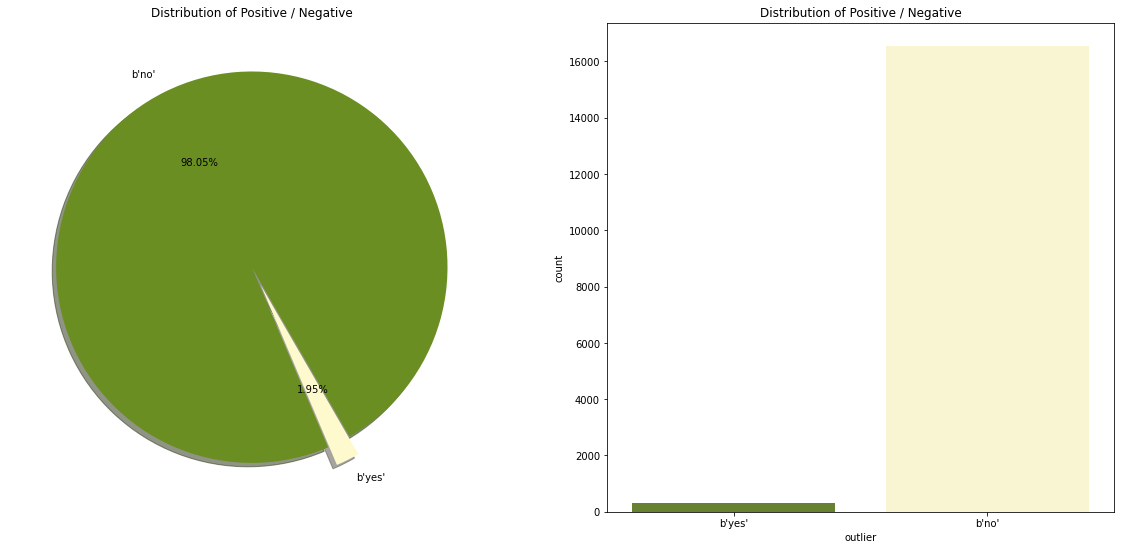

In [ ]:
a , ax = plt.subplots(1,2,figsize=(20,9))
data['outlier'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.2f%%',ax=ax[0],shadow=True, startangle=300, colors = ['olivedrab','lemonchiffon'])
ax[0].set_title('Distribution of Positive / Negative')
ax[0].set_ylabel('')
sns.countplot('outlier', data = data ,ax=ax[1], palette=['olivedrab','lemonchiffon'])
ax[1].set_title('Distribution of Positive / Negative')
plt.show()

I will consider all columns that have less than 10 unique values to be categorical.

In [ ]:
categorical_cols, numerical_cols = [], []
for column in data.columns:
    if data[column].nunique() < 10:
        categorical_cols.append(column)
    else:
        numerical_cols.append(column)

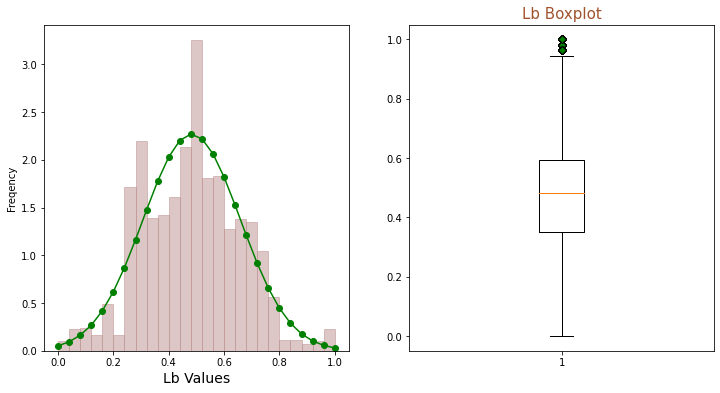

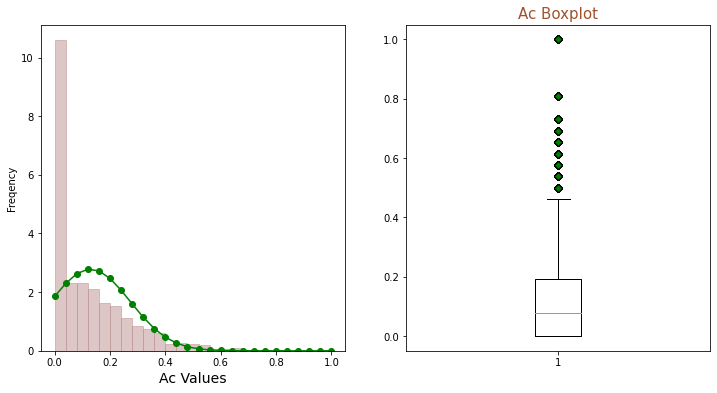

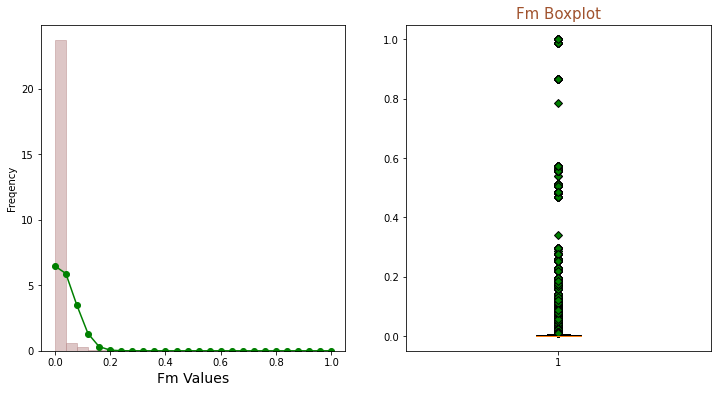

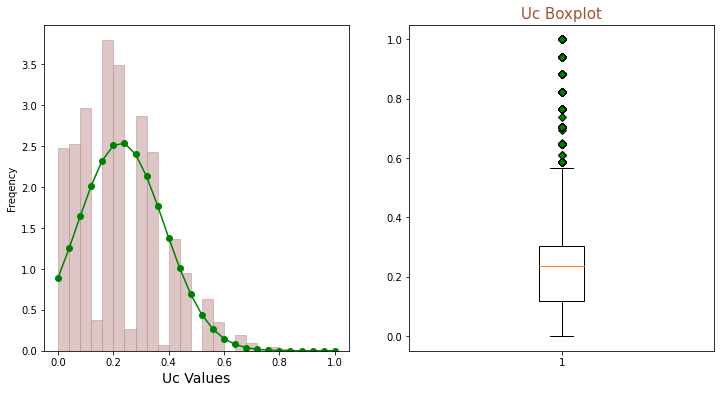

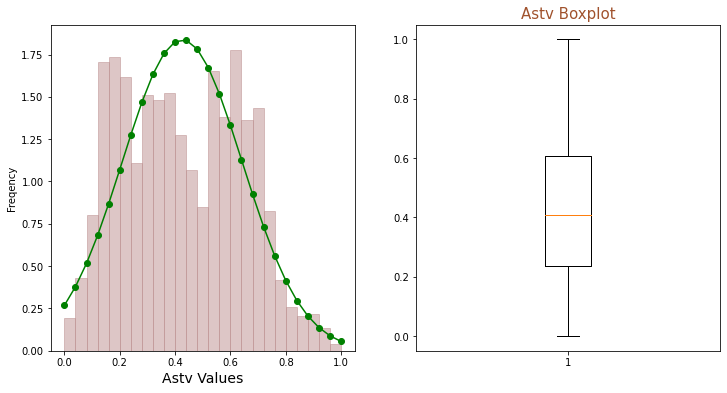

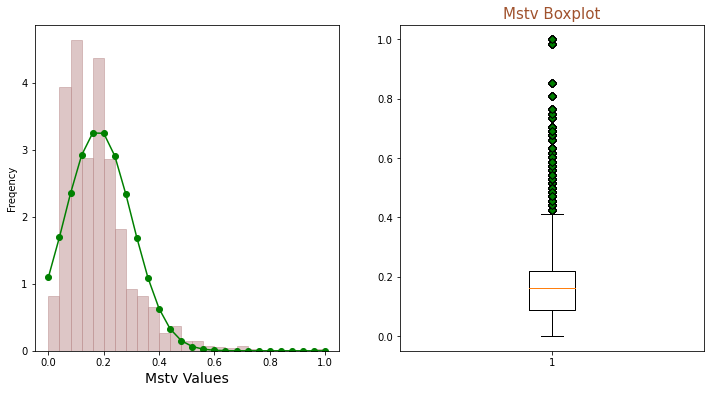

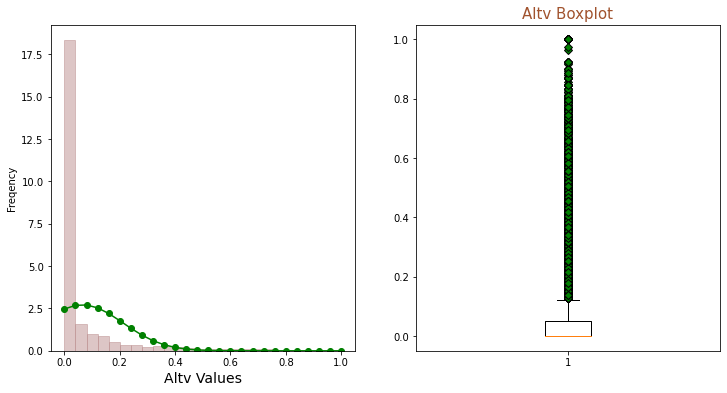

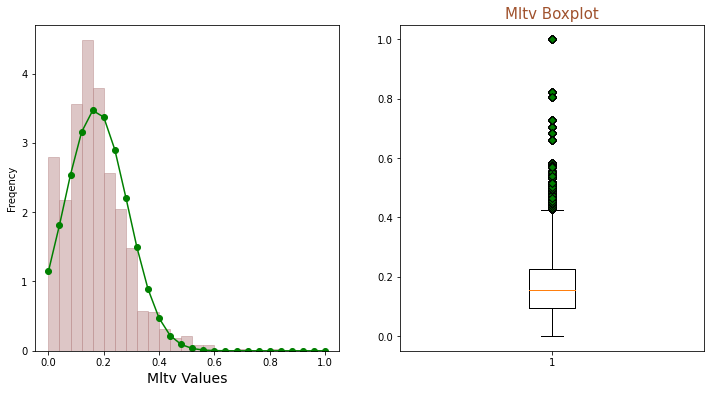

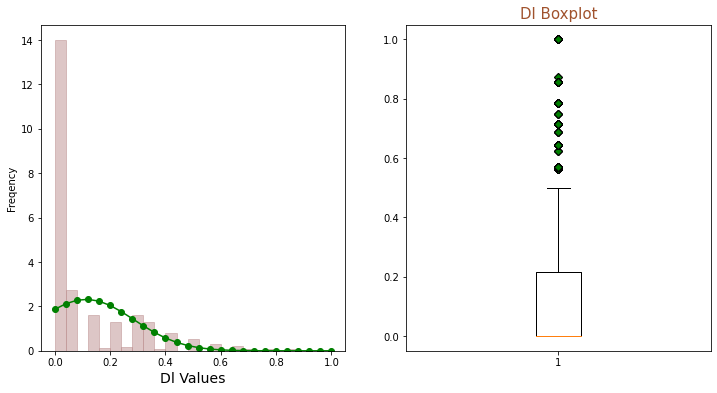

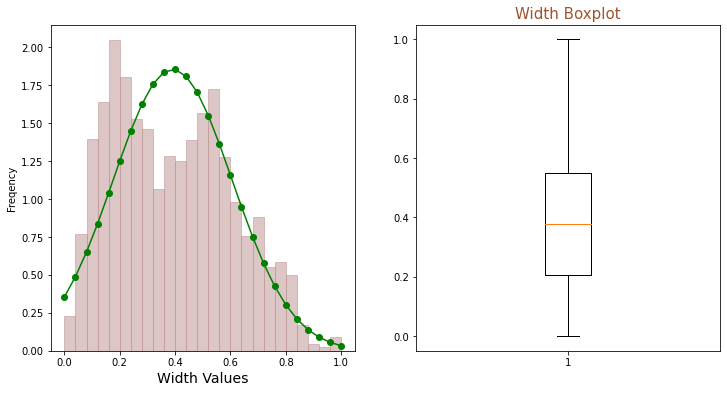

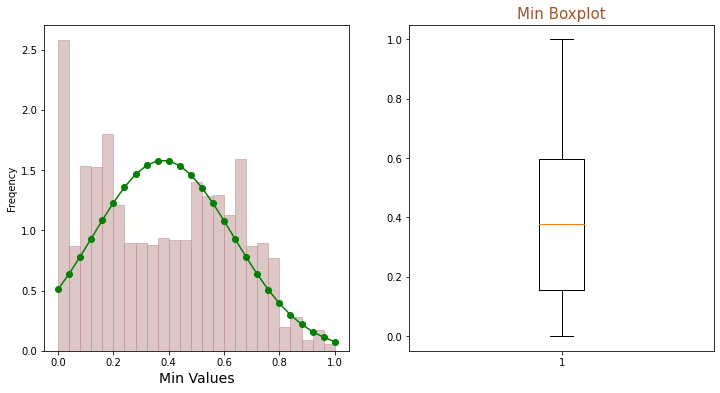

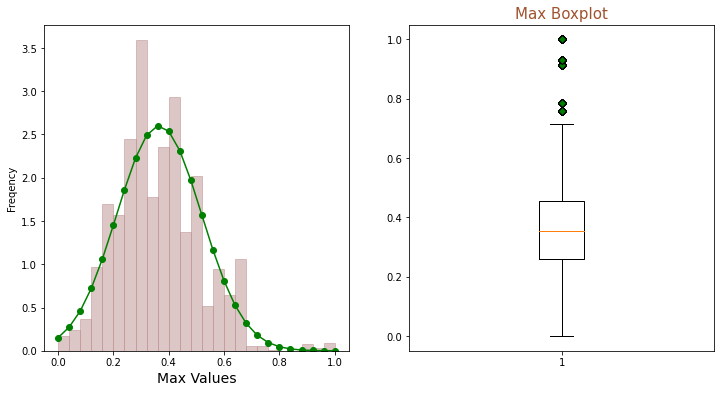

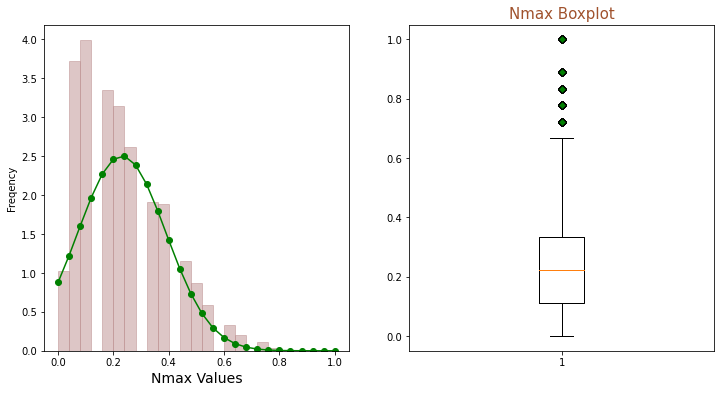

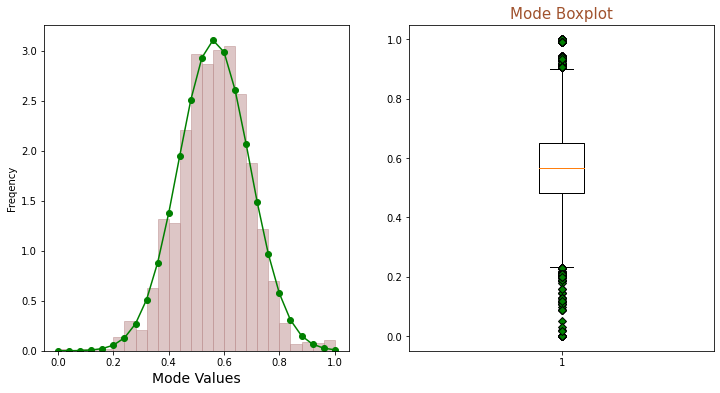

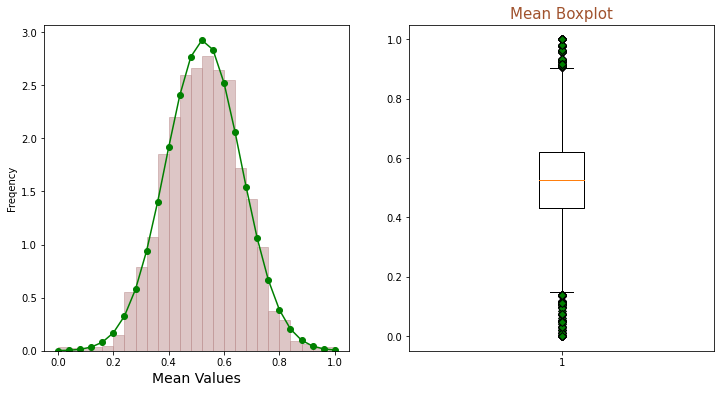

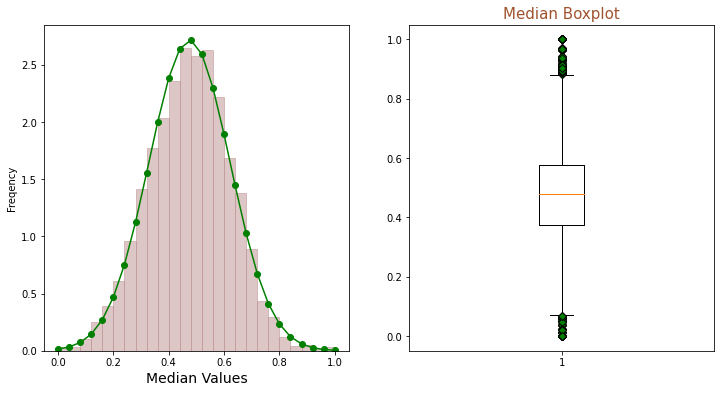

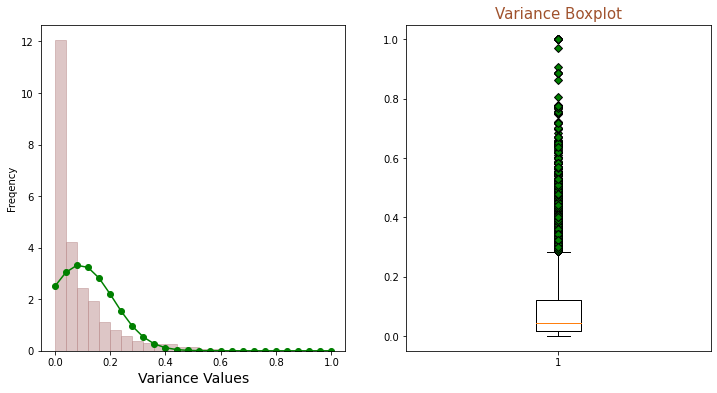

In [ ]:
for column_name in numerical_cols:

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # Distribution Num. Feature
    _, bins, _ = ax1.hist(data[column_name], bins = 25,
                          density = 1, alpha = 0.5,
                          color = 'rosybrown',
                          ec= 'rosybrown' )

    mu, sigma = stats.norm.fit(data[column_name])
    best_fit_line = stats.norm.pdf(bins, mu, sigma)

    ax1.plot(bins, best_fit_line, 'g-o')

    ax1.set_ylabel('Freqency')
    ax1.set_xlabel(column_name.capitalize() + " Values",fontsize=14)

    # Boxplot
    green_diamond = dict(markerfacecolor='g', marker='D')
    ax2.boxplot(data[column_name],flierprops=green_diamond)

    ax2.set_title(column_name.capitalize() + " Boxplot",
                  fontdict=dict(
                  family="DejaVu Sans",
                  size=15,
                  color="sienna"))
    plt.show()

I can see from the graph that it is necessary to normalize some data, as well as that there are some atypical values. I will now examine the categorical variables.

In [ ]:
for column_name in categorical_cols:
    print('Number of unique values in column -', column_name, ": ", data[column_name].nunique())
    print('unique values in column -', column_name, ": ", data[column_name].value_counts())
    print("--------------------------------------------------------------------")

Number of unique values in column - DS :  2
unique values in column - DS :  0.0    16867
1.0       13
Name: DS, dtype: int64
--------------------------------------------------------------------
Number of unique values in column - DP :  5
unique values in column - DP :  0.000000    16127
0.333333      572
0.500000      142
0.666667       20
1.000000       19
Name: DP, dtype: int64
--------------------------------------------------------------------
Number of unique values in column - Nzeros :  9
unique values in column - Nzeros :  0.0    12704
0.1     3054
0.2      918
0.3      161
0.5       20
0.4       11
1.0       10
0.8        1
0.7        1
Name: Nzeros, dtype: int64
--------------------------------------------------------------------
Number of unique values in column - Tendency :  3
unique values in column - Tendency :  0.5    9028
1.0    6809
0.0    1043
Name: Tendency, dtype: int64
--------------------------------------------------------------------
Number of unique values in co

It is necessary to encode the `outlier` column.

In [ ]:
data['outlier'] = data['outlier'].replace({"b'yes'": 1, "b'no'": 0})

I will now examine the data marked as outliers in more depth.

In [ ]:
data_outlier=data[data['outlier']==1].reset_index(drop=True)

In [ ]:
data_outlier

,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,outlier
0,0.592593,0.000000,0.000000,0.294118,0.633803,0.338235,0.000000,0.013807,0.500000,0.0,...,0.045872,0.336207,0.333333,0.1,0.485149,0.247423,0.284091,0.638418,1.0,1
1,0.574074,0.038462,0.000000,0.000000,0.816901,0.029412,0.527473,0.092702,0.000000,0.0,...,0.770642,0.672414,0.166667,0.0,0.534653,0.587629,0.511364,0.016949,0.0,1
2,0.777778,0.000000,0.000000,0.000000,0.774648,0.029412,0.736264,0.096647,0.000000,0.0,...,0.816514,0.275862,0.222222,0.0,0.633663,0.659794,0.602273,0.000000,1.0,1
3,0.259259,0.000000,0.000000,0.294118,0.704225,0.191176,0.000000,0.183432,0.428571,0.0,...,0.174312,0.275862,0.222222,0.1,0.000000,0.164948,0.000000,0.361582,0.0,1
4,0.592593,0.000000,0.001773,0.294118,0.633803,0.352941,0.000000,0.013807,0.428571,0.0,...,0.045872,0.336207,0.333333,0.1,0.485149,0.226804,0.272727,0.683616,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,0.277778,0.000000,0.001773,0.235294,0.720000,0.279412,0.000000,0.126233,0.785714,1.0,...,0.045872,0.327586,0.388889,0.0,0.000000,0.110092,0.000000,0.615819,0.0,1
326,0.722222,0.000000,0.000000,0.117647,0.493333,0.058824,0.037975,0.228797,0.000000,0.0,...,0.825688,0.387931,0.000000,0.0,0.766667,0.761468,0.702128,0.016949,1.0,1
327,0.555556,0.038462,0.000000,0.294118,0.653333,0.044118,0.607595,0.157791,0.000000,0.0,...,0.678899,0.284483,0.500000,0.0,0.625000,0.614679,0.521277,0.011299,0.5,1
328,0.759259,0.000000,0.000000,0.294118,0.480000,0.058824,0.658228,0.102564,0.000000,0.0,...,0.908257,0.387931,0.111111,0.0,0.775000,0.779817,0.712766,0.000000,0.5,1


In [ ]:
for column_name in categorical_cols:
    print('Number of unique values in column -', column_name, ": ", data_outlier[column_name].nunique())
    print('unique values in column -', column_name, ": ", data_outlier[column_name].value_counts())
    print("--------------------------------------------------------------------")

Number of unique values in column - DS :  2
unique values in column - DS :  0.0    327
1.0      3
Name: DS, dtype: int64
--------------------------------------------------------------------
Number of unique values in column - DP :  5
unique values in column - DP :  0.000000    267
0.333333     20
0.666667     20
1.000000     19
0.500000      4
Name: DP, dtype: int64
--------------------------------------------------------------------
Number of unique values in column - Nzeros :  7
unique values in column - Nzeros :  0.0    274
0.1     44
0.2      8
0.4      1
0.8      1
0.3      1
0.7      1
Name: Nzeros, dtype: int64
--------------------------------------------------------------------
Number of unique values in column - Tendency :  3
unique values in column - Tendency :  0.5    158
1.0    139
0.0     33
Name: Tendency, dtype: int64
--------------------------------------------------------------------
Number of unique values in column - outlier :  1
unique values in column - outlier :  

I'm not getting some key troubleshooting information from the `Tendency` column, so I'm dropping it.

In [ ]:
del data["Tendency"]

For the categorical columns, I will create dummies columns.

In [ ]:
data = pd.get_dummies(data, columns=['DS','DP', 'Nzeros','DP'])

Now I will create a new dataframe that contains some additional logarithmized columns from the data table.

In [ ]:
data_log = data

In [ ]:
data_l=data[['AC','UC', 'MSTV','ALTV','MLTV','DL','Width','Nmax','Variance']]

In [ ]:
columns=data_l.columns

In [ ]:
data_log[columns] = data_l[columns].apply(lambda x: np.log(x + 1))

In [ ]:
data_log

,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,Width,...,Nzeros_0.4,Nzeros_0.5,Nzeros_0.7,Nzeros_0.8,Nzeros_1.0,DP_0.0,DP_0.3333333333333333,DP_0.5,DP_0.6666666666666666,DP_1.0
0,0.592593,0.00000,0.000000,0.257829,0.633803,0.291352,0.000000,0.013712,0.405465,0.467109,...,0,0,0,0,0,1,0,0,0,0
1,0.574074,0.03774,0.000000,0.000000,0.816901,0.028988,0.423614,0.088654,0.000000,0.310540,...,0,0,0,0,0,1,0,0,0,0
2,0.777778,0.00000,0.000000,0.000000,0.774648,0.028988,0.551736,0.092257,0.000000,0.067064,...,0,0,0,0,0,1,0,0,0,0
3,0.259259,0.00000,0.000000,0.257829,0.704225,0.174941,0.000000,0.168419,0.356675,0.387972,...,0,0,0,0,0,0,1,0,0,0
4,0.592593,0.00000,0.001773,0.257829,0.633803,0.302281,0.000000,0.013712,0.356675,0.467109,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16875,0.629630,0.00000,0.000000,0.302281,0.893333,0.014599,0.225672,0.154996,0.000000,0.092019,...,0,0,0,0,0,1,0,0,0,0
16876,0.629630,0.00000,0.000000,0.344840,0.893333,0.043172,0.284512,0.129331,0.068993,0.064162,...,0,0,0,0,0,1,0,0,0,0
16877,0.629630,0.00000,0.000000,0.302281,0.893333,0.057158,0.293991,0.118878,0.068993,0.092019,...,0,0,0,0,0,1,0,0,0,0
16878,0.629630,0.00000,0.000000,0.211309,0.866667,0.070952,0.194900,0.111848,0.068993,0.119121,...,0,0,0,0,0,1,0,0,0,0


Data normalisation:

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data_log[numerical_cols] = scaler.fit_transform(data_log[numerical_cols])
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

In [ ]:
data_log

,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,Width,...,Nzeros_0.4,Nzeros_0.5,Nzeros_0.7,Nzeros_0.8,Nzeros_1.0,DP_0.0,DP_0.3333333333333333,DP_0.5,DP_0.6666666666666666,DP_1.0
0,0.622570,-0.963209,-0.188582,0.493455,0.959293,1.366441,-0.470205,-1.490569,2.208047,0.968554,...,0,0,0,0,0,1,0,0,0,0
1,0.517192,-0.644993,-0.188582,-1.579188,1.803208,-1.369299,3.144966,-0.689773,-0.692839,-0.050117,...,0,0,0,0,0,1,0,0,0,0
2,1.676357,-0.963209,-0.188582,-1.579188,1.608459,-1.369299,4.238365,-0.651266,-0.692839,-1.634221,...,0,0,0,0,0,1,0,0,0,0
3,-1.274245,-0.963209,-0.188582,0.493455,1.283876,0.152600,-0.470205,0.162567,1.858979,0.453670,...,0,0,0,0,0,0,1,0,0,0
4,0.622570,-0.963209,-0.159281,0.493455,0.959293,1.480401,-0.470205,-1.490569,1.858979,0.968554,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16875,0.833328,-0.963209,-0.188582,0.850795,2.155489,-1.519335,1.455704,0.019133,-0.692839,-1.471861,...,0,0,0,0,0,1,0,0,0,0
16876,0.833328,-0.963209,-0.188582,1.192924,2.155489,-1.221393,1.957855,-0.255107,-0.199232,-1.653104,...,0,0,0,0,0,1,0,0,0,0
16877,0.833328,-0.963209,-0.188582,0.850795,2.155489,-1.075554,2.038748,-0.366804,-0.199232,-1.471861,...,0,0,0,0,0,1,0,0,0,0
16878,0.833328,-0.963209,-0.188582,0.119488,2.032580,-0.931728,1.193096,-0.441923,-0.199232,-1.295530,...,0,0,0,0,0,1,0,0,0,0


I will check correlations between features:

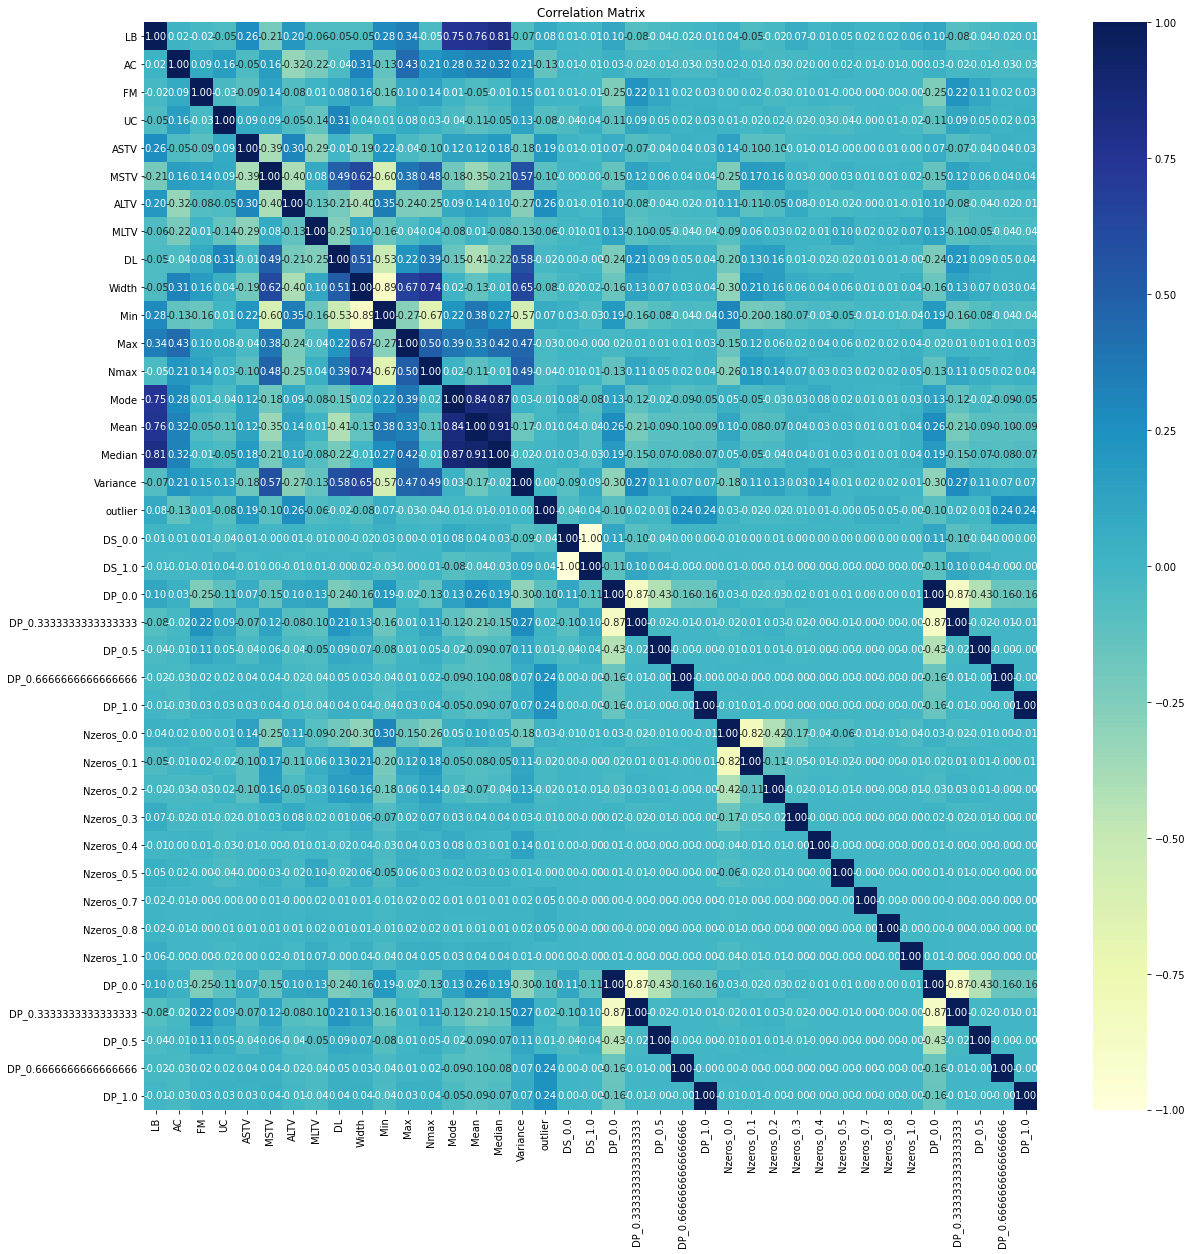

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix
corr = data_log.corr()

# Set up figure size
fig, ax = plt.subplots(figsize=(20, 20))

# Set up heatmap using Seaborn
sns.heatmap(corr, cmap='YlGnBu', annot=True, fmt='.2f', ax=ax)

# Set plot title
plt.title('Correlation Matrix')

# Display plot
plt.show()

In [ ]:
data_log1=data_log.drop(["outlier"],axis=1)

I can see that there is a high correlation between some features, so using the PCA method I will try to reduce the dimensionality and select features for further work.

### PCA

In [ ]:
from sklearn.decomposition import PCA
def find_n_components(X):
    # Define number of components to test
    n_components = len(X.columns)

    # Fit PCA for different numbers of components
    pca = PCA()
    pca.fit(X)

    # Plot explained variance ratio and cumulative explained variance ratio
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].plot(np.arange(1, n_components+1), pca.explained_variance_ratio_, 'o-')
    ax[0].set_xlabel('Number of components')
    ax[0].set_ylabel('Explained variance ratio')
    ax[0].set_title('Scree plot')
    ax[1].plot(np.arange(1, n_components+1), np.cumsum(pca.explained_variance_ratio_), 'o-')
    ax[1].set_xlabel('Number of components')
    ax[1].set_ylabel('Cumulative explained variance ratio')
    ax[1].set_title('Cumulative scree plot')
    plt.show()

In [ ]:
def run_pca(df, n):
    X = df.drop('outlier', axis=1)
    y = df['outlier']

    # apply PCA with n components
    pca = PCA(n_components=n)
    X_pca = pca.fit_transform(X)

    # create a new dataframe with the PCA components and the target variable
    df_pca = pd.DataFrame(data=X_pca)
    df_pca['outlier'] = y
    return df_pca

- In the "cumulative scree plot", you can see the cumulative explained variance ratio for each number of components. The optimal number of components can be selected based on the point where the cumulative explained variance ratio reaches a certain threshold (e.g., 95%).

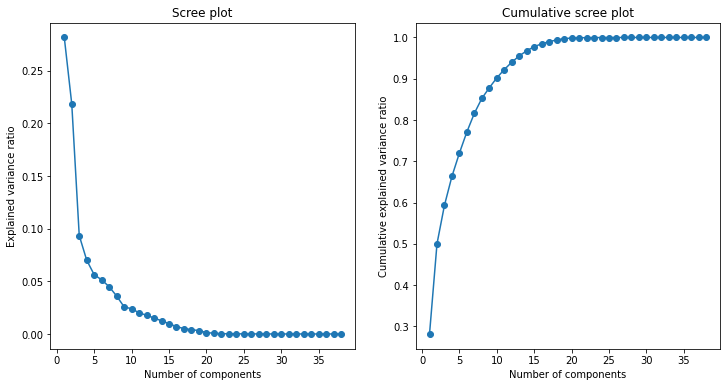

In [ ]:
find_n_components(data_log1)

In [ ]:
data_pca = run_pca(data_log, 15)

In [ ]:
data_pca

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,outlier
0,4.199460,-0.415173,2.986361,1.542209,-0.203213,0.523895,-1.536540,-0.792282,0.102368,1.462809,-0.535517,0.830974,1.265341,-0.043542,0.784499,1
1,-2.721946,0.578816,1.104908,2.062053,0.734656,-1.790053,-0.008442,1.601024,2.218969,0.119209,-0.533049,-1.174283,-0.360961,0.355527,-0.287888,1
2,-4.620418,0.386929,1.263553,2.932162,0.887762,-0.855059,-0.517783,1.859999,0.357907,-0.173785,0.411242,0.381191,-0.175832,0.925810,0.305034,1
3,3.951434,-4.692580,2.136015,0.829552,-0.151933,-0.326297,0.387427,-0.806264,1.043376,1.502214,-1.003249,-0.490871,1.033322,0.997322,2.127334,1
4,4.368354,-0.494034,2.991460,1.506059,0.029939,0.605106,-1.616757,-0.700003,0.174213,1.755880,-0.862998,1.118479,1.373741,-0.340306,1.426513,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16875,-3.827407,-0.134464,1.484200,0.846983,-0.114860,0.313745,1.142274,-0.119687,0.046808,0.636275,0.048058,0.330435,0.185602,-0.247741,-0.041923,0
16876,-3.788339,-0.150710,2.109079,0.916844,-0.123501,0.685218,0.980614,0.240787,0.104330,0.511174,0.303623,0.380190,0.159091,-0.039055,-0.202185,0
16877,-3.632462,-0.163598,2.017919,1.096447,-0.015429,0.437825,0.785921,0.243381,0.121437,0.474358,0.490212,0.286940,0.106145,-0.127661,-0.173398,0
16878,-3.203166,0.184751,1.476898,1.035028,0.068450,-0.000895,0.391132,-0.382681,0.294388,0.201263,0.196847,0.457612,0.069187,-0.042549,-0.239700,0


#### Examination of outliers based on MCD Estimators and Mahalanobis distances of data

In [ ]:
def get_mcd_outliers(data, threshold, type="outlier"):

    # MCD Estimators and Mahalanobis distances of data
    mcd_estimator=MinCovDet().fit(data)
    mahalanobis=mcd_estimator.mahalanobis(data)

    # Calculate outliers based on threshold
    if type=="outlier":
        transformation = lambda x: 0 if x <= threshold else 1
    elif type=="weights":
        transformation = lambda x: 1 if x <= threshold else 0
    outliers = np.array([transformation(xi) for xi in mahalanobis])
    return outliers

In [ ]:
data_pca1=data_pca.drop(["outlier"],axis=1)

In [ ]:
from sklearn.covariance import MinCovDet
from scipy.stats import chi2
p=data.shape[1]
threshold = chi2.ppf(0.975, p)
mcd_outliers = get_mcd_outliers(data_pca1,threshold)
data_pca["Outlier_MCD"] = mcd_outliers

In [ ]:
data_pca

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,outlier,Outlier_MCD
0,4.199460,-0.415173,2.986361,1.542209,-0.203213,0.523895,-1.536540,-0.792282,0.102368,1.462809,-0.535517,0.830974,1.265341,-0.043542,0.784499,1,1
1,-2.721946,0.578816,1.104908,2.062053,0.734656,-1.790053,-0.008442,1.601024,2.218969,0.119209,-0.533049,-1.174283,-0.360961,0.355527,-0.287888,1,0
2,-4.620418,0.386929,1.263553,2.932162,0.887762,-0.855059,-0.517783,1.859999,0.357907,-0.173785,0.411242,0.381191,-0.175832,0.925810,0.305034,1,0
3,3.951434,-4.692580,2.136015,0.829552,-0.151933,-0.326297,0.387427,-0.806264,1.043376,1.502214,-1.003249,-0.490871,1.033322,0.997322,2.127334,1,1
4,4.368354,-0.494034,2.991460,1.506059,0.029939,0.605106,-1.616757,-0.700003,0.174213,1.755880,-0.862998,1.118479,1.373741,-0.340306,1.426513,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16875,-3.827407,-0.134464,1.484200,0.846983,-0.114860,0.313745,1.142274,-0.119687,0.046808,0.636275,0.048058,0.330435,0.185602,-0.247741,-0.041923,0,0
16876,-3.788339,-0.150710,2.109079,0.916844,-0.123501,0.685218,0.980614,0.240787,0.104330,0.511174,0.303623,0.380190,0.159091,-0.039055,-0.202185,0,0
16877,-3.632462,-0.163598,2.017919,1.096447,-0.015429,0.437825,0.785921,0.243381,0.121437,0.474358,0.490212,0.286940,0.106145,-0.127661,-0.173398,0,0
16878,-3.203166,0.184751,1.476898,1.035028,0.068450,-0.000895,0.391132,-0.382681,0.294388,0.201263,0.196847,0.457612,0.069187,-0.042549,-0.239700,0,0


In [ ]:
accuracy_score(data_pca["outlier"], data_pca["Outlier_MCD"])

0.6151066350710901

In [ ]:
data_pca = data_pca.drop(["Outlier_MCD"],axis=1)

## Modeling

### Supervised models - functions

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

Below are the functions for the following algorithms:

- LogisticRegression
- KNeighborsClassifier
- SVM

In [ ]:
svm_results = []
logreg_results = []
knn_results = []

In [ ]:
def svm_func(X_train_res, X_test, y_train_res, y_test):
    # Train SVM classifier
    clf = svm.SVC()
    clf.fit(X_train_res, y_train_res)

    # Make predictions on test set
    y_pred = clf.predict(X_test)

    # Calculate score
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    print("SVM accuracy: {:.2f}%".format(accuracy*100), "      SVM f1: {:.2f}%".format(f1*100), "      SVM roc_auc: {:.2f}%".format(roc_auc*100))
    return [accuracy*100, f1*100, roc_auc*100]

In [ ]:
def logreg_func(X_train_res, X_test, y_train_res, y_test):
    # Create and fit logistic regression model
    logreg = LogisticRegression()
    logreg.fit(X_train_res, y_train_res)

    # Predict on test set and evaluate model
    y_pred = logreg.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    print("Logreg accuracy: {:.2f}%".format(accuracy*100), "      Logreg f1: {:.2f}%".format(f1*100), "      Logreg roc_auc: {:.2f}%".format(roc_auc*100))
    return [accuracy*100, f1*100, roc_auc*100]

In [ ]:
def knn_func(X_train_res, X_test, y_train_res, y_test):
    # Create and fit KNN model
    knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
    knn.fit(X_train_res, y_train_res)

    # Predict on test set and evaluate model
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    print("KNN accuracy: {:.2f}%".format(accuracy*100), "      KNN f1: {:.2f}%".format(f1*100), "      KNN roc_auc: {:.2f}%".format(roc_auc*100))
    return [accuracy*100, f1*100, roc_auc*100]

## Log

In [ ]:
# Split data_log into training and testing sets
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(data_log.drop(['outlier'], axis=1), data_log['outlier'], test_size=0.2)

In [ ]:
svm_results.append(["data_log"] + svm_func(X_train_log, X_test_log, y_train_log, y_test_log))
logreg_results.append(["data_log"] + logreg_func(X_train_log, X_test_log, y_train_log, y_test_log))
knn_results.append(["data_log"] + knn_func(X_train_log, X_test_log, y_train_log, y_test_log))

SVM accuracy: 98.82%       SVM f1: 68.25%       SVM roc_auc: 75.90%
Logreg accuracy: 98.43%       Logreg f1: 56.20%       Logreg roc_auc: 70.42%
KNN accuracy: 98.90%       KNN f1: 71.76%       KNN roc_auc: 78.30%


## ADA + Log

Given that I am working with an unbalanced data set, I will examine how the data behaves using the ADASYN technique.

In [ ]:
from imblearn.over_sampling import ADASYN
ADA_X_train_log, ADA_X_test_log, ADA_y_train_log, ADA_y_test_log = train_test_split(data_log.drop(['outlier'], axis=1), data_log['outlier'], test_size=0.2)
ada = ADASYN()
ADA_X_train_res_log, ADA_y_train_res_log = ada.fit_resample(ADA_X_train_log, ADA_y_train_log)

In [ ]:
svm_results.append(["ADA data_log"] + svm_func(ADA_X_train_res_log, ADA_X_test_log, ADA_y_train_res_log, ADA_y_test_log))
logreg_results.append(["ADA data_log"] + logreg_func(ADA_X_train_res_log, ADA_X_test_log, ADA_y_train_res_log, ADA_y_test_log))
knn_results.append(["ADA data_log"] + knn_func(ADA_X_train_res_log, ADA_X_test_log, ADA_y_train_res_log, ADA_y_test_log))

SVM accuracy: 96.12%       SVM f1: 47.39%       SVM roc_auc: 94.91%
Logreg accuracy: 89.84%       Logreg f1: 26.55%       Logreg roc_auc: 94.04%
KNN accuracy: 99.44%       KNN f1: 85.04%       KNN roc_auc: 92.71%


## PCA

In [ ]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(data_pca.drop(['outlier'], axis=1), data_pca['outlier'], test_size=0.2)

In [ ]:
svm_results.append(["data_pca"] + svm_func(X_train_pca, X_test_pca, y_train_pca, y_test_pca))
logreg_results.append(["data_pca"] + logreg_func(X_train_pca, X_test_pca, y_train_pca, y_test_pca))
knn_results.append(["data_pca"] + knn_func(X_train_pca, X_test_pca, y_train_pca, y_test_pca))

SVM accuracy: 99.26%       SVM f1: 67.53%       SVM roc_auc: 75.49%
Logreg accuracy: 98.82%       Logreg f1: 45.95%       Logreg roc_auc: 66.58%
KNN accuracy: 99.50%       KNN f1: 80.46%       KNN roc_auc: 84.30%


## SMOTE + PCA

In [ ]:
from imblearn.combine import SMOTEENN

In [ ]:
from imblearn.over_sampling import SMOTE
smote_X_train_pca, smote_X_test_pca, smote_y_train_pca, smote_y_test_pca = train_test_split(data_pca.drop(['outlier'], axis=1), data_pca['outlier'], test_size=0.2)
sm = SMOTEENN(random_state=42)
smote_X_train_res_pca, smote_y_train_res_pca = sm.fit_resample(smote_X_train_pca, smote_y_train_pca)

In [ ]:
svm_results.append(["smote data_pca"] + svm_func(smote_X_train_res_pca, smote_X_test_pca, smote_y_train_res_pca, smote_y_test_pca))
logreg_results.append(["smote data_pca"] + logreg_func(smote_X_train_res_pca, smote_X_test_pca, smote_y_train_res_pca, smote_y_test_pca))
knn_results.append(["smote data_pca"] + knn_func(smote_X_train_res_pca, smote_X_test_pca, smote_y_train_res_pca, smote_y_test_pca))

SVM accuracy: 95.88%       SVM f1: 45.91%       SVM roc_auc: 93.38%
Logreg accuracy: 87.17%       Logreg f1: 22.26%       Logreg roc_auc: 91.20%
KNN accuracy: 99.35%       KNN f1: 84.06%       KNN roc_auc: 94.39%


## ADA + PCA

In [ ]:
ADA_X_train_pca, ADA_X_test_pca, ADA_y_train_pca, ADA_y_test_pca = train_test_split(data_pca.drop(['outlier'], axis=1), data_pca['outlier'], test_size=0.2)
sm = ADASYN()
ADA_X_train_res_pca, ADA_y_train_res_pca = sm.fit_resample(ADA_X_train_pca, ADA_y_train_pca)

In [ ]:
svm_results.append(["ADA data_pca"] + svm_func(ADA_X_train_res_pca, ADA_X_test_pca, ADA_y_train_res_pca, ADA_y_test_pca))
logreg_results.append(["ADA data_pca"] + logreg_func(ADA_X_train_res_pca, ADA_X_test_pca, ADA_y_train_res_pca, ADA_y_test_pca))
knn_results.append(["ADA data_pca"] + knn_func(ADA_X_train_res_pca, ADA_X_test_pca, ADA_y_train_res_pca, ADA_y_test_pca))

SVM accuracy: 96.39%       SVM f1: 53.08%       SVM roc_auc: 96.12%
Logreg accuracy: 85.87%       Logreg f1: 22.19%       Logreg roc_auc: 90.06%
KNN accuracy: 99.59%       KNN f1: 89.55%       KNN roc_auc: 91.64%


### Supervised models evaluation

In [ ]:
svm_evaluation = pd.DataFrame(svm_results, columns=['data', 'accuracy', 'f1 score', 'roc auc score'])
logreg_evaluation = pd.DataFrame(logreg_results, columns=['data', 'accuracy', 'f1 score', 'roc auc score'])
knn_evaluation = pd.DataFrame(knn_results, columns=['data', 'accuracy', 'f1 score', 'roc auc score'])

In [ ]:
# Define a function to color max value in Series
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

In [ ]:
svm_evaluation = svm_evaluation.style.apply(highlight_max, subset=['accuracy', 'f1 score', 'roc auc score'])
svm_evaluation

,data,accuracy,f1 score,roc auc score
0,data_log,98.815166,68.253968,75.903614
1,ADA data_log,96.119668,47.389558,94.908705
2,data_pca,99.259479,67.532468,75.490196
3,smote data_pca,95.882701,45.914397,93.376159
4,ADA data_pca,96.386256,53.076923,96.115819


In [ ]:
logreg_evaluation = logreg_evaluation.style.apply(highlight_max, subset=['accuracy', 'f1 score', 'roc auc score'])
logreg_evaluation

,data,accuracy,f1 score,roc auc score
0,data_log,98.430095,56.198347,70.421193
1,ADA data_log,89.840047,26.552463,94.044864
2,data_pca,98.815166,45.945946,66.576441
3,smote data_pca,87.174171,22.262118,91.198801
4,ADA data_pca,85.870853,22.185971,90.064232


In [ ]:
knn_evaluation = knn_evaluation.style.apply(highlight_max, subset=['accuracy', 'f1 score', 'roc auc score'])
knn_evaluation

,data,accuracy,f1 score,roc auc score
0,data_log,98.904028,71.755725,78.298069
1,ADA data_log,99.437204,85.039370,92.706222
2,data_pca,99.496445,80.459770,84.298688
3,smote data_pca,99.348341,84.057971,94.388867
4,ADA data_pca,99.585308,89.552239,91.636400


Considering the received evaluation, we can note the following:
- `accuracy`
    - SVM: The best result is obtained on the data on which PCA is applied
    - LogisticRegression: The best result is obtained on the data on which PCA is applied
    - KNeighborsClassifier: The best result is obtained on the data on which ADA and PCA are applied
- `f1`
    - SVM: The best result is obtained on the data on which LOG is applied
    - LogisticRegression: The best result is obtained on the data on which LOG is applied
    - KNeighborsClassifier: The best result is obtained on the data on which ADA and PCA are applied    
- `roc auc`
    - SVM: The best result is obtained on the data on which ADA and PCA are applied
    - LogisticRegression: The best result is obtained on the data on which ADA and LOG are applied  
    - KNeighborsClassifier: The best result is obtained on the data on which SMOTE and PCA are applied    
        
Overall:
- the **KNN** model has the best **Accuracy** of all models on **ADA+PCA** data,
- the **KNN** model has the best **F1** of all models on **ADA+PCA** data,
- the **SVM** model has the best **Roc Auc** of all models on **ADA+PCA** data

### Unsupervised models - functions

Below are the functions for the following algorithms:

- OneClassSVM
- IsolationForest

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest

In [ ]:
oneclass_svm_results_1 = []
isolation_forest_results_1 = []

In [ ]:
from sklearn.svm import OneClassSVM
def oneclass_svm_1(X_train, X_test, y_train, y_test):

    ocsvm = OneClassSVM()
    ocsvm.fit(X_train)
    ocsvm_preds = ocsvm.predict(X_test)
    ocsvm_preds[ocsvm_preds == 1] = 0  # inlier
    ocsvm_preds[ocsvm_preds == -1] = 1  # outlier

    # Calculate accuracy score
    accuracy = accuracy_score(y_test, ocsvm_preds)
    f1 = f1_score(y_test, ocsvm_preds, pos_label=1, average='binary')
    roc_auc = roc_auc_score(y_test, ocsvm_preds)

    print("OneClassSVM accuracy: {:.2f}%".format(accuracy*100), "      OneClassSVM f1: {:.2f}%".format(f1*100), "      OneClassSVM roc_auc_score: {:.2f}%".format(roc_auc*100))
    return [accuracy*100, f1*100, roc_auc*100]

In [ ]:
from sklearn.ensemble import IsolationForest
def isolation_forest_1(X_train, X_test, y_train, y_test):

    iforest = IsolationForest()
    iforest.fit(X_train)
    iforest_preds = iforest.predict(X_test)
    iforest_preds[iforest_preds == 1] = 0  # inlier
    iforest_preds[iforest_preds == -1] = 1  # outlier

    # Calculate accuracy score
    accuracy = accuracy_score(y_test, iforest_preds)
    f1 = f1_score(y_test, iforest_preds, pos_label=1, average='binary')
    roc_auc = roc_auc_score(y_test, iforest_preds)

    print("IsolationForest accuracy: {:.2f}%".format(accuracy*100), "      IsolationForest f1: {:.2f}%".format(f1*100),  "      IsolationForest roc_auc: {:.2f}%".format(roc_auc*100))
    return [accuracy*100, f1*100, roc_auc*100]

### Implementation

In [ ]:
oneclass_svm_results_1.append(["data_log"] + oneclass_svm_1(X_train_log, X_test_log, y_train_log, y_test_log))
isolation_forest_results_1.append(["data_log"] + isolation_forest_1(X_train_log, X_test_log, y_train_log, y_test_log))
print("-----------------------------------------------------------------------------------------------------")
oneclass_svm_results_1.append(["data_pca"] + oneclass_svm_1(X_train_pca, X_test_pca, y_train_pca, y_test_pca))
isolation_forest_results_1.append(["data_pca"] + isolation_forest_1(X_train_pca, X_test_pca, y_train_pca, y_test_pca))
print("-----------------------------------------------------------------------------------------------------")
oneclass_svm_results_1.append(["smote data_pca"] + oneclass_svm_1(smote_X_train_res_pca, smote_X_test_pca, smote_y_train_res_pca, smote_y_test_pca))
isolation_forest_results_1.append(["smote data_pca"] + isolation_forest_1(smote_X_train_res_pca, smote_X_test_pca, smote_y_train_res_pca, smote_y_test_pca))
print("-----------------------------------------------------------------------------------------------------")
oneclass_svm_results_1.append(["ADA data_pca"] + oneclass_svm_1(ADA_X_train_res_pca, ADA_X_test_pca, ADA_y_train_res_pca, ADA_y_test_pca))
isolation_forest_results_1.append(["ADA data_pca"] + isolation_forest_1(ADA_X_train_res_pca, ADA_X_test_pca, ADA_y_train_res_pca, ADA_y_test_pca))
print("-----------------------------------------------------------------------------------------------------")
oneclass_svm_results_1.append(["ADA data_log"] + oneclass_svm_1(ADA_X_train_res_log, ADA_X_test_log, ADA_y_train_res_log, ADA_y_test_log))
isolation_forest_results_1.append(["ADA data_log"] + isolation_forest_1(ADA_X_train_res_log, ADA_X_test_log, ADA_y_train_res_log, ADA_y_test_log))
print("-----------------------------------------------------------------------------------------------------")

OneClassSVM accuracy: 51.66%       OneClassSVM f1: 8.72%       OneClassSVM roc_auc_score: 72.28%
IsolationForest accuracy: 89.07%       IsolationForest f1: 8.89%       IsolationForest roc_auc: 56.23%
-----------------------------------------------------------------------------------------------------
OneClassSVM accuracy: 52.55%       OneClassSVM f1: 5.54%       OneClassSVM roc_auc_score: 72.05%
IsolationForest accuracy: 92.51%       IsolationForest f1: 8.00%       IsolationForest roc_auc: 57.58%
-----------------------------------------------------------------------------------------------------
OneClassSVM accuracy: 55.69%       OneClassSVM f1: 4.59%       OneClassSVM roc_auc_score: 55.54%
IsolationForest accuracy: 92.74%       IsolationForest f1: 5.41%       IsolationForest roc_auc: 52.56%
-----------------------------------------------------------------------------------------------------
OneClassSVM accuracy: 53.76%       OneClassSVM f1: 6.36%       OneClassSVM roc_auc_score: 63.4

### Unsupervised models evaluation

In [ ]:
oneclass_svm_evaluation_1 = pd.DataFrame(oneclass_svm_results_1, columns=['data', 'accuracy', 'f1 score', 'roc auc score'])
isolation_forest_evaluation_1 = pd.DataFrame(isolation_forest_results_1, columns=['data', 'accuracy', 'f1 score', 'roc auc score'])

In [ ]:
# Define a function to color max value in Series
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

In [ ]:
oneclass_svm_evaluation_1 = oneclass_svm_evaluation_1.style.apply(highlight_max, subset=['accuracy', 'f1 score', 'roc auc score'])
oneclass_svm_evaluation_1

,data,accuracy,f1 score,roc auc score
0,data_log,51.658768,8.724832,72.284034
1,data_pca,52.547393,5.542453,72.048356
2,smote data_pca,55.687204,4.591837,55.538880
3,ADA data_pca,53.761848,6.358728,63.470204
4,ADA data_log,54.768957,5.682520,63.718924


In [ ]:
isolation_forest_evaluation_1 = isolation_forest_evaluation_1.style.apply(highlight_max, subset=['accuracy', 'f1 score', 'roc auc score'])
isolation_forest_evaluation_1

,data,accuracy,f1 score,roc auc score
0,data_log,89.069905,8.888889,56.227522
1,data_pca,92.505924,8.000000,57.581306
2,smote data_pca,92.742891,5.405405,52.560695
3,ADA data_pca,90.847156,9.384164,57.282419
4,ADA data_log,90.343602,8.938547,58.487728


Overall:
- the **IsolationForest** model has better **Accuracy** on **SMOTE+PCA** data,
- the **IsolationForest** model has the best **F1** of all models on **ADA+PCA** data,
- the **IsolationForest** model has the best **Roc Auc** of all models on **ADA+LOG** data,

but we will see results after hyperparameters tuning.

### Unsupervised models - hyperparameters tuning


In [ ]:
oneclass_svm_results = []
isolation_forest_results = []

#### Choosing optimal parameters

In [ ]:
def ocsvm_grid_search(X_train):
    # Define the parameter grid for OneClassSVM
    ocsvm_param_grid = {'nu': [0.001, 0.01, 0.1, 0.5],
                        'kernel': ['linear','poly', 'sigmoid'],
                        'gamma': ['auto', 'scale']}

    ocsvm = OneClassSVM()
    ocsvm_grid = GridSearchCV(ocsvm, ocsvm_param_grid, cv=7, scoring='f1')
    ocsvm_grid.fit(X_train)
    print("Best hyperparameters for OneClassSVM:", ocsvm_grid.best_params_)
    return ocsvm_grid.best_params_

In [ ]:
def if_grid_search(X_train):
    # Define the parameter grid for IsolationForest
    if_param_grid = {'n_estimators': [300, 500],
                     'max_samples': [0.1, 0.2, 0.5],
                     'max_features': [0.1, 0.5, 0.9],
                     'contamination': np.linspace(0.001, 0.1, 5)}

    iforest = IsolationForest()
    if_grid = GridSearchCV(iforest, if_param_grid, cv=7, scoring='f1')
    if_grid.fit(X_train)
    print("Best hyperparameters for IsolationForest:", if_grid.best_params_)
    return if_grid.best_params_

### Implementation

In [ ]:
from sklearn.svm import OneClassSVM
def oneclass_svm(X_train, X_test, y_train, y_test):
    parameters = ocsvm_grid_search(X_train)

    ocsvm = OneClassSVM(**parameters)
    ocsvm.fit(X_train)
    ocsvm_preds = ocsvm.predict(X_test)
    ocsvm_preds[ocsvm_preds == 1] = 0  # inlier
    ocsvm_preds[ocsvm_preds == -1] = 1  # outlier

    # Calculate accuracy score
    accuracy = accuracy_score(y_test, ocsvm_preds)
    f1 = f1_score(y_test, ocsvm_preds, pos_label=1, average='binary')

    print("OneClassSVM accuracy: {:.2f}%".format(accuracy*100), "      OneClassSVM f1: {:.2f}%".format(f1*100))
    return [accuracy*100, f1*100]

In [ ]:
from sklearn.ensemble import IsolationForest
def isolation_forest(X_train, X_test, y_train, y_test):
    parameters = if_grid_search(X_train)

    iforest = IsolationForest(**parameters)
    iforest.fit(X_train)
    iforest_preds = iforest.predict(X_test)
    iforest_preds[iforest_preds == 1] = 0  # inlier
    iforest_preds[iforest_preds == -1] = 1  # outlier

    # Calculate accuracy score
    accuracy = accuracy_score(y_test, iforest_preds)
    f1 = f1_score(y_test, iforest_preds, pos_label=1, average='binary')

    print("IsolationForest accuracy: {:.2f}%".format(accuracy*100), "      IsolationForest f1: {:.2f}%".format(f1*100))
    return [accuracy*100, f1*100]

In [ ]:
oneclass_svm_results.append(["data_pca"] + oneclass_svm(X_train_pca, X_test_pca, y_train_pca, y_test_pca))
isolation_forest_results.append(["data_pca"] + isolation_forest(X_train_pca, X_test_pca, y_train_pca, y_test_pca))
print("-----------------------------------------------------------------------------------")
oneclass_svm_results.append(["smote data_pca"] + oneclass_svm(smote_X_train_res_pca, smote_X_test_pca, smote_y_train_res_pca, smote_y_test_pca))
isolation_forest_results.append(["smote data_pca"] + isolation_forest(smote_X_train_res_pca, smote_X_test_pca, smote_y_train_res_pca, smote_y_test_pca))
print("-----------------------------------------------------------------------------------")
oneclass_svm_results.append(["ADA data_pca"] + oneclass_svm(ADA_X_train_res_pca, ADA_X_test_pca, ADA_y_train_res_pca, ADA_y_test_pca))
isolation_forest_results.append(["ADA data_pca"] + isolation_forest(ADA_X_train_res_pca, ADA_X_test_pca, ADA_y_train_res_pca, ADA_y_test_pca))
print("-----------------------------------------------------------")
oneclass_svm_results.append(["ADA data_log"] +  oneclass_svm(ADA_X_train_res_log, ADA_X_test_log, ADA_y_train_res_log, ADA_y_test_log))
isolation_forest_results.append(["ADA data_log"] + isolation_forest(ADA_X_train_res_log, ADA_X_test_log, ADA_y_train_res_log, ADA_y_test_log))
print("-----------------------------------------------------------")

Best hyperparameters for OneClassSVM: {'gamma': 'auto', 'kernel': 'linear', 'nu': 0.05}
OneClassSVM accuracy: 34.48%       OneClassSVM f1: 1.25%
Best hyperparameters for IsolationForest: {'contamination': 0.01, 'max_features': 0.5, 'max_samples': 0.1, 'n_estimators': 300}
IsolationForest accuracy: 97.42%       IsolationForest f1: 4.40%
-----------------------------------------------------------------------------------
Best hyperparameters for OneClassSVM: {'gamma': 'auto', 'kernel': 'linear', 'nu': 0.05}
OneClassSVM accuracy: 20.41%       OneClassSVM f1: 1.76%
Best hyperparameters for IsolationForest: {'contamination': 0.01, 'max_features': 0.5, 'max_samples': 0.1, 'n_estimators': 300}
IsolationForest accuracy: 97.07%       IsolationForest f1: 1.98%
-----------------------------------------------------------------------------------
Best hyperparameters for OneClassSVM: {'gamma': 'auto', 'kernel': 'linear', 'nu': 0.05}
OneClassSVM accuracy: 29.53%       OneClassSVM f1: 1.49%
Best hyperp

### Unsupervised models evaluation

In [ ]:
oneclass_svm_evaluation = pd.DataFrame(oneclass_svm_results, columns=['data', 'accuracy', 'f1 score'])
isolation_forest_evaluation = pd.DataFrame(isolation_forest_results, columns=['data', 'accuracy', 'f1 score'])

In [ ]:
oneclass_svm_evaluation = oneclass_svm_evaluation.style.apply(highlight_max, subset=['accuracy', 'f1 score'])
oneclass_svm_evaluation

,data,accuracy,f1 score
0,data_pca,34.478673,1.250000
1,smote data_pca,20.408768,1.755027
2,ADA data_pca,29.531991,1.490683
3,ADA data_log,93.366243,0.000012


In [ ]:
isolation_forest_evaluation = isolation_forest_evaluation.style.apply(highlight_max, subset=['accuracy', 'f1 score'])
isolation_forest_evaluation

,data,accuracy,f1 score
0,data_pca,97.422986,4.395604
1,smote data_pca,97.067536,1.980198
2,ADA data_pca,96.593602,4.958678
3,ADA data_log,97.753821,17.398241


Considering the received evaluation, we can note the following:
- `accuracy`
    - OneClassSVM: The best result is obtained on the data on which ADA+LOG are applied
    - IsolationForest: The best result is obtained on the data on which ADA+LOG are applied
- `f1`
    - OneClassSVM: The best result is obtained on the data on which SMOTE+PCA are applied
    - IsolationForest: The best result is obtained on the data on which ADA+LOG are applied
        
Overall:
- the **IsolationForest** model has better **Accuracy** of OneClassSVM model (the best on **ADA+LOG** data),
- the **IsolationForest** model has better **F1** of OneClassSVM model (the best on **ADA+LOG** data)